In [1]:
import pandas as pd
import numpy as np
from utils import utility
from utils.encoder import OneHotEncoder, ThermometerEncoder, IntegerEncoder
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.metrics import classification_report
%load_ext autoreload
%autoreload 2

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
national_poll_on_healthy_aging_npha = fetch_ucirepo(id=936) 
  
# data (as pandas dataframes) 
data = national_poll_on_healthy_aging_npha.data.features 
target = national_poll_on_healthy_aging_npha.data.targets 
df = pd.concat([data, target],axis=1)

In [3]:
ordinal_features = ['Physical_Health', 'Mental_Health', 'Dental_Health', 'Employment', 'Trouble_Sleeping', 'Prescription_Sleep_Medication']
label = ['Number_of_Doctors_Visited']
nominal_features = list(set(df.columns) - (set(ordinal_features + label)))
nominal_features.remove('Age') #there's only a single value (2) observed for this feature hence removed
# ordinal_features_plus = ['checking_status']
# ordinal_features_plus = ordinal_features

In [4]:
unique_dic = utility.df_to_dict(df)
unique_ordered_dic = utility.order(unique_dic, *(nominal_features+ordinal_features+label))

# other_dic = {k: unique_dic[k] for k in other_features}
nominal_dic = {k: unique_ordered_dic[k] for k in set(unique_ordered_dic).intersection(nominal_features)}
ordinal_dic = {k: unique_ordered_dic[k] for k in set(unique_ordered_dic).intersection(ordinal_features)}
label_dic = {k: unique_ordered_dic[k] for k in set(unique_ordered_dic).intersection(label)}

# ordinal_dic_plus = {key: ordinal_dic[key] for key in ordinal_features_plus}
nom_num, ord_num = sum([len(val) for val in nominal_dic.values()]), sum([len(val) for val in ordinal_dic.values()])
nom_num + ord_num, nom_num + len(ordinal_dic)


(48, 23)

In [5]:
ordinal_dic

{'Physical_Health': array([-1,  1,  2,  3,  4,  5], dtype=int64),
 'Employment': array([1, 2, 3, 4], dtype=int64),
 'Mental_Health': array([-1,  1,  2,  3,  4,  5], dtype=int64),
 'Dental_Health': array([-1,  1,  2,  3,  4,  5,  6], dtype=int64),
 'Trouble_Sleeping': array([-1,  1,  2,  3], dtype=int64),
 'Prescription_Sleep_Medication': array([-1,  1,  2,  3], dtype=int64)}

In [6]:
100*((nom_num + ord_num)/len(df))

6.722689075630252

In [7]:
ordinal_dic

{'Physical_Health': array([-1,  1,  2,  3,  4,  5], dtype=int64),
 'Employment': array([1, 2, 3, 4], dtype=int64),
 'Mental_Health': array([-1,  1,  2,  3,  4,  5], dtype=int64),
 'Dental_Health': array([-1,  1,  2,  3,  4,  5,  6], dtype=int64),
 'Trouble_Sleeping': array([-1,  1,  2,  3], dtype=int64),
 'Prescription_Sleep_Medication': array([-1,  1,  2,  3], dtype=int64)}

In [8]:
df=pd.concat([data, target],axis=1)
df.to_csv('clean_dataset/npha/npha.csv',index=False)
feature_dic = {'nominal': nominal_dic,'ordinal': ordinal_dic, 'label': label_dic}
import pickle
with open('clean_dataset/npha/npha_dic.pkl', 'wb') as f:
    pickle.dump(feature_dic, f)

Text(0.5, 1.0, 'National Poll on Healthy Aging (NPHA)')

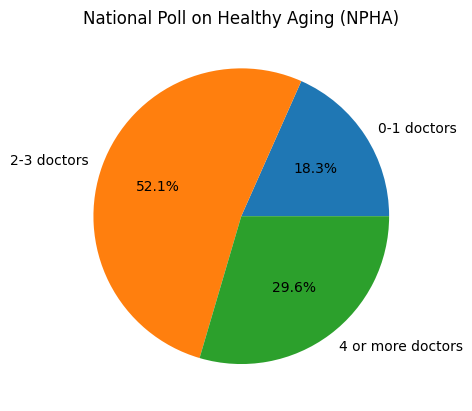

In [9]:
labels = list(label_dic.values())[0]
label_names = ['0-1 doctors', '2-3 doctors', '4 or more doctors']
sizes = [len(df[df['Number_of_Doctors_Visited'] == val]) for val in labels]
plt.pie(sizes, labels=label_names, autopct='%1.1f%%')
plt.title('National Poll on Healthy Aging (NPHA)')

In [10]:
# import random
# from sklearn.model_selection import KFold
# k=10
# regr = LogisticRegression(C=0.1, multi_class='multinomial')
# test_pred_res, test_true_res = [], []
# train_pred_res, train_true_res = [], []
# # sc = StandardScaler()
# kf = KFold(k)   
# X = df.iloc[:, :-1]
# y = df.iloc[:, -1]
# for train_index, test_index in kf.split(df):
#     X_train, y_train, X_test, y_test = X.iloc[train_index], pd.DataFrame(y.iloc[train_index]), X.iloc[test_index], pd.DataFrame(y.iloc[test_index])
#     # random_train, random_test, _ = utility.encoding_pipeline(X_train[ordinal_features_plus], X_test[ordinal_features_plus], ThermometerEncoder, ordinal_dic_plus)
#     nominal_train, nominal_test, _ = utility.encoding_pipeline(X_train[nominal_features], X_test[nominal_features], OneHotEncoder, nominal_dic)
#     ordinal_train, ordinal_test, _ = utility.encoding_pipeline(X_train[ordinal_features], X_test[ordinal_features], IntegerEncoder, ordinal_dic)
#     # other_train, other_test = np.array(X_train[other_features].values), np.array(X_test[other_features].values)
#     # sc.fit(other_train)
#     # other_train, other_test = sc.transform(other_train), sc.transform(other_test)
#     # y_train, y_test, _ = utility.encoding_pipeline(y_train, y_test, IntegerEncoder, label_dic)
#     # X_train_all, X_test_all = ordinal_train, ordinal_test
#     X_train_all, X_test_all = np.concatenate([nominal_train, ordinal_train], axis=1), np.concatenate([nominal_test, ordinal_test], axis=1)
#     # X_train_all, X_test_all = np.concatenate([other_train, nominal_train, ordinal_train, random_train], axis=1), np.concatenate([other_test, nominal_test, ordinal_test, random_test], axis=1)
#     regr.fit(X_train_all, y_train)
#     y_pred_test = regr.predict(X_test_all)
#     y_pred_train = regr.predict(X_train_all)
#     test_true_res = test_true_res+ [np.squeeze(y_test)] if len(test_true_res)> 0 else [np.squeeze(y_test)]
#     test_pred_res = test_pred_res+ [np.squeeze(y_pred_test)] if len(test_pred_res)> 0 else [np.squeeze(y_pred_test)]
#     train_true_res = train_true_res+ [np.squeeze(y_train)] if len(train_true_res)> 0 else [np.squeeze(y_train)]
#     train_pred_res = train_pred_res+ [np.squeeze(y_pred_train)] if len(train_pred_res)> 0 else [np.squeeze(y_pred_train)]

# test_temp_res, train_temp_res = [], []
# for i in range(k):
#     test_temp_res.append(classification_report(test_true_res[i], test_pred_res[i], output_dict=True)) 
#     train_temp_res.append(classification_report(train_true_res[i], train_pred_res[i], output_dict=True)) 
# clf_rep_dic_test, clf_rep_dic_train = utility.concat_dic(*test_temp_res), utility.concat_dic(*train_temp_res)
# test_res, train_res = utility.mean_std_dic(clf_rep_dic_test), utility.mean_std_dic(clf_rep_dic_train)

In [11]:
# test_res

In [12]:
res, models, res_train = utility.k_fold_validation(k=10, 
                  df=df, 
                  encoders=[OneHotEncoder, ThermometerEncoder, IntegerEncoder],  
                  pred_task=
                    {
                      'name': 'classification',
                      'model': LogisticRegression(C=0.1, multi_class='multinomial', max_iter=1000),
                      'metric': {'clf_rep': lambda y_true, y_pred: classification_report(y_true, y_pred, output_dict=True)}
                    }, 
                  features=
                    {
                      'ordinal': {
                        'name': ordinal_features,
                        'dict': ordinal_dic
                      },
                      'nominal': {
                        'name': nominal_features,
                        'dict': nominal_dic
                      },
                      'label': label_dic
                    },
                    return_model=True,
                    train_result=True)

c:\Users\wmarc\anaconda3\envs\bthesis\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\wmarc\anaconda3\envs\bthesis\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\wmarc\anaconda3\envs\bthesis\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\wmarc\anaconda3\envs\bthesis\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

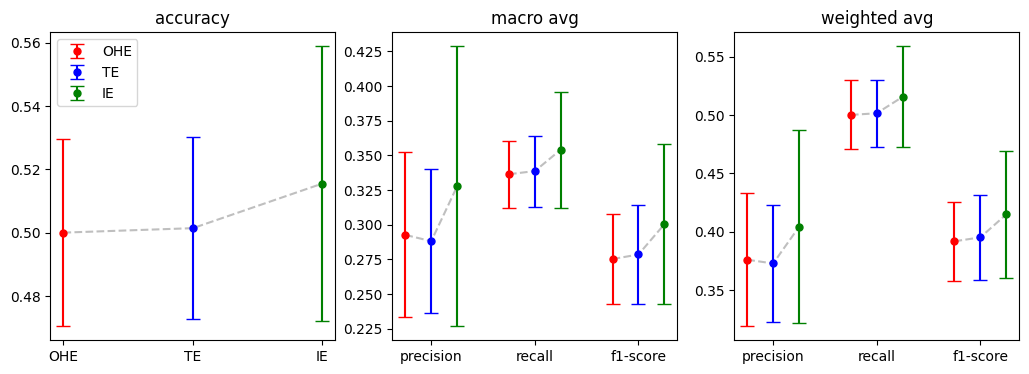

In [13]:
import matplotlib.pyplot as plt
import math
def deep_copy(dic):
    dic_res = {}
    for key, val in dic.items():
        dic_res[key] = deep_copy(val) if isinstance(val, dict) else val
    return dic_res
def round_decimal_places(df, d):
    dec = math.pow(10,d)
    df_copy = df.copy()
    df_copy = df_copy.map(lambda x: (math.ceil(x[0]*dec)/dec, math.ceil(x[1]*dec)/dec))
    return df_copy
res_temp = res
res_copy = deep_copy(res_temp)
d = 12
for encoder in res.keys():
    res_copy[encoder]['clf_rep']['accuracy'] = {key: res_temp[encoder]['clf_rep']['accuracy'] for key in res_copy[encoder]['clf_rep']['macro avg'].keys()}
# df_lists = [pd.DataFrame(res_copy[key.__str__()]['clf_rep']).rename_axis(key.__str__(), axis="columns") for key in res_copy.keys()]
df_lists = [round_decimal_places(pd.DataFrame(res_copy[key.__str__()]['clf_rep']).rename_axis(key.__str__(), axis="columns").drop(index='support'), d) for key in res_copy.keys()]

plot_dic = {}
metrics = ['accuracy','macro avg', 'weighted avg']
inner_metrics = ['precision', 'recall', 'f1-score']

plot_dic = {}
for key in metrics:
    plot_dic[key] = {k: [] for k in inner_metrics}
    for key2 in inner_metrics:
        for dfs in df_lists:
            df_dict = dfs.to_dict()
            plot_dic[key][key2].append(list(df_dict[key][key2]))
            
            
modelss = ["OneHotEncoder", "ThermometerEncoder", "IntegerEncoder"]
model_names = ['OHE', 'TE', 'IE']
colors = ['r', 'b', 'g']
x_axis_placement = np.array([-0.25, 0, 0.25])
fig, ax = plt.subplots(1, 3, figsize=(12.5,4))
ax = ax.ravel()
for i, (key, val) in enumerate(plot_dic.items()):
    if key == 'accuracy':
        accs = np.array(val['precision'])
        ax[i].errorbar(range(len(accs)), accs[:,0], accs[:,1], alpha = 0.5, fmt='--', color = 'grey') 
        for j, (mean, std) in enumerate(accs):
            (_,caps,_)= ax[i].errorbar(j, accs[:,0][j], accs[:,1][j], label=model_names[j],color = colors[j], alpha = 1, fmt='.', markersize=10, capsize = 5) 
            for cap in caps:
                cap.set_markeredgewidth(1)
    else:  
        for j, (key2, val2) in enumerate(val.items()):
            model = np.array(val2)    
            x_axis=np.ones(len(model))*j
            ax[i].errorbar(x_axis + x_axis_placement, model[:,0], model[:,1], alpha = 0.5, fmt='--', color = 'grey')
            for k in range(len(x_axis)):
                (_,caps,_)= ax[i].errorbar(j + x_axis_placement[k], model[:,0][k], model[:,1][k], label=model_names[k], color = colors[k], alpha = 1, fmt='.', markersize=10, capsize = 5) if j == 0 else ax[i].errorbar(j + x_axis_placement[k], model[:,0][k], model[:,1][k], color = colors[k], alpha = 1, fmt='.', markersize=10, capsize = 5) 
                for cap in caps:
                    cap.set_markeredgewidth(1)
for i, axe in enumerate(ax):
    axe.set_title(metrics[i])
    if metrics[i] == 'accuracy':
        axe.set_xticks(range(len(modelss)), model_names)
    else:
        axe.set_xticks(range(len(inner_metrics)), inner_metrics)

ax[0].legend()             
                

In [74]:
k=10
classes= list(label_dic.values())[0]
class_num = 1 if len(classes) == 2 else len(classes)
spec_dic  = {classes[j]: {key: [] for key in ordinal_dic.keys()} for j in range(len(classes))}
for i in range(k):
    ohe_1 = models['OneHotEncoder'][i]
    te_1 = models['ThermometerEncoder'][i]
    ie_1 = models['IntegerEncoder'][i]

    nom_num, ord_num = sum([len(val) for val in nominal_dic.values()]), sum([len(val) for val in ordinal_dic.values()])
    ohe_1_coef,te_1_coef, ie_1_coef = ohe_1.coef_.squeeze(), te_1.coef_.squeeze(), ie_1.coef_.squeeze()
    for j in range(class_num):
        ord_coef_dic = utility.create_coef_dic(nom_num, ordinal_dic, ordinal_features, ohe_1_coef[j],te_1_coef[j])
        ord_coef_dic_cum = {key: [val[0]]+[np.cumsum(val[1])] for key, val in ord_coef_dic.items()}
        for key, val in ord_coef_dic_cum.items():
            spec_dic[classes[j]][key] += [np.corrcoef(val)[0][1]]    
spec_dic_mean_std = {key: {key2: (np.mean(val2), np.std(val2)) for key2, val2 in val.items()} for key, val in spec_dic.items()}    


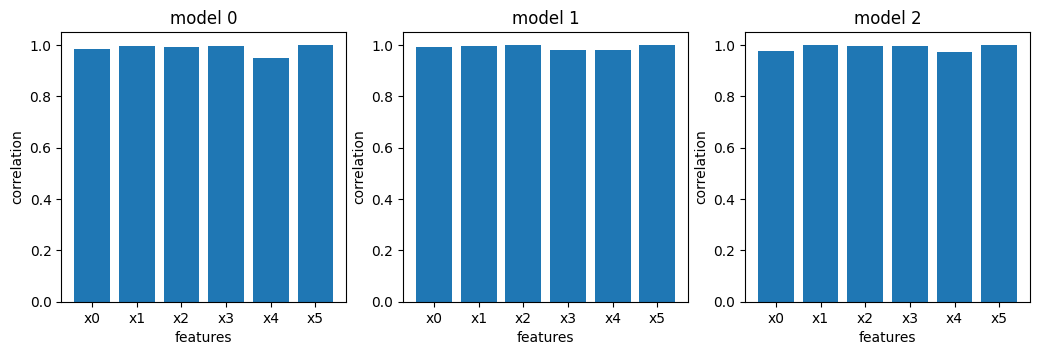

In [75]:

fig, ax = plt.subplots(1,3, figsize=(12.5,3.5))
ax = ax.ravel()
for j, (_, spec) in enumerate(spec_dic_mean_std.items()):
    spec_plot = {key: val[0] for key, val in spec.items()}
    ax[j].bar([f'x{i}' for i in range(len(spec_plot))], spec_plot.values())
    ax[j].set_xlabel('features')
    ax[j].set_ylabel('correlation')
    ax[j].set_title(f'model {j}')

In [76]:
nom_num, ord_num = sum([len(val) for val in nominal_dic.values()]), sum([len(val) for val in ordinal_dic.values()])
class_choice = 1
all_ohe_coef = np.array([models['OneHotEncoder'][i].coef_.squeeze()[class_choice] for i in range(k)])
all_te_coef = np.array([models['ThermometerEncoder'][i].coef_.squeeze()[class_choice] for i in range(k)])
# all_te_coef_cumsum = [np.cumsum(all_te_coef[:, other_num+nom_num:], axis=1) for i in [len(val) for val in ordinal_dic.values()]]
all_te_coef_cumsum = []
s=0
for i in [len(val) for val in ordinal_dic.values()]:
    all_te_coef_cumsum.append(np.cumsum(all_te_coef[:, nom_num+s:nom_num+s+i], axis=1))
    s+=i
all_te_coef_cumsum = np.concatenate(tuple(all_te_coef_cumsum), axis=1)
all_ie_coef = np.array([models['IntegerEncoder'][i].coef_.squeeze()[class_choice] for i in range(k)])


all_ohe_coef_mean = np.mean(all_ohe_coef, axis=0)
# all_te_coef_mean = np.array(list(np.mean(all_te_coef, axis=0)[:other_num+nom_num]) + list(np.mean(all_te_coef_cumsum, axis=0)))
all_te_coef_mean = np.mean(np.concatenate((all_te_coef[:, :nom_num], all_te_coef_cumsum), axis=1), axis=0)
all_ie_coef_mean = np.mean(all_ie_coef, axis=0)
all_ie_coef_temp = []
for idx, i in enumerate([len(val) for val in ordinal_dic.values()]):
    all_ie_coef_temp.append(np.array([all_ie_coef_mean[nom_num:][idx]]*i)*np.linspace(1,i,i))
all_ie_coef_temp = np.concatenate(tuple(all_ie_coef_temp))
all_ie_coef_mean = np.concatenate((all_ie_coef_mean[:nom_num], all_ie_coef_temp))

# all_ohe_coef_mean = StandardScaler().fit_transform(all_ohe_coef_mean.reshape(-1, 1)).squeeze()
# all_te_coef_mean = StandardScaler().fit_transform(all_te_coef_mean.reshape(-1, 1)).squeeze()
# all_ie_coef_mean = StandardScaler().fit_transform(all_ie_coef_mean.reshape(-1, 1)).squeeze()

all_ohe_coef_std = np.std(all_ohe_coef, axis=0)
all_te_coef_std = np.array(list(np.std(all_te_coef, axis=0)[:nom_num]) + list(np.std(all_te_coef_cumsum, axis=0)))
all_ie_coef_std = np.std(all_ie_coef, axis=0)
all_ie_coef_temp = []
for idx, i in enumerate([len(val) for val in ordinal_dic.values()]):
    all_ie_coef_temp.append(np.array([all_ie_coef_std[nom_num:][idx]]*i)*np.array([1]*i))
all_ie_coef_temp = np.concatenate(tuple(all_ie_coef_temp))
all_ie_coef_std = np.concatenate((all_ie_coef_std[:nom_num], all_ie_coef_temp))

# all_ohe_coef.shape, all_te_coef.shape, all_ie_coef.shape
all_ohe_coef_mean.shape, all_te_coef_mean.shape, all_ie_coef_mean.shape
# all_ohe_coef_std.shape, all_te_coef_std.shape, all_ie_coef_std.shape

((48,), (48,), (48,))

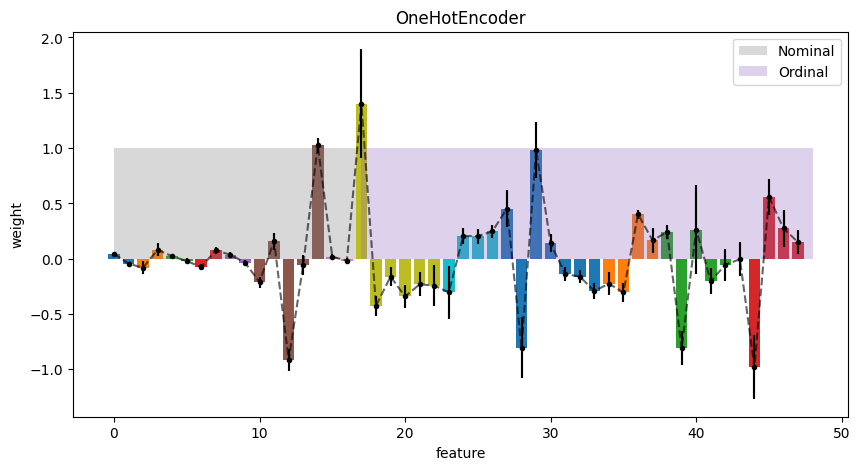

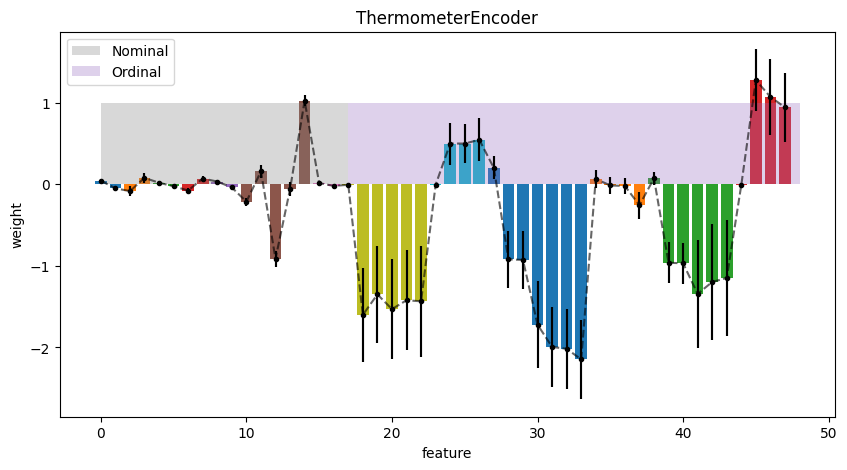

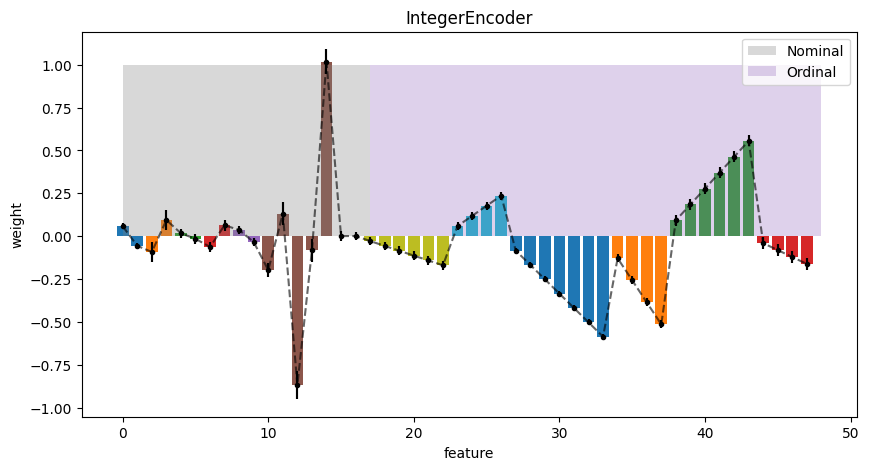

In [77]:
import matplotlib.pyplot as plt
nom_num, ord_num = sum([len(val) for val in nominal_dic.values()]), sum([len(val) for val in ordinal_dic.values()])
title = ["OneHotEncoder", "ThermometerEncoder", "IntegerEncoder"]
label = ['Nominal', 'Ordinal']
for idx, (all_mean, all_std) in enumerate(zip([all_ohe_coef_mean, all_te_coef_mean, all_ie_coef_mean], [all_ohe_coef_std, all_te_coef_std, all_ie_coef_std])):
    plt.figure(figsize=(10,5))
    start_1 = 0
    # if idx == 2:
    #     ord_num = len(ordinal_dic.values())
    for idxx, (i, unique_val) in enumerate(zip([nom_num, ord_num], [[len(val) for val in nominal_dic.values()], [len(val) for val in ordinal_dic.values()]])):
        start_2 = 0
        # if idxx == 2 and idx == 2:
        #     unique_val = [1]*i
        for j in unique_val:  
            plt.bar(range(len(all_mean))[start_1+start_2:start_1+start_2+i+j], all_mean[start_1+start_2:start_1+start_2+i+j])
            start_2 += j
        plt.fill_between(x=[start_1, start_1+i] ,y1=[0.0], y2=[1,1],alpha=0.3,label=label[idxx])
        start_1 += i
        
    plt.errorbar(range(len(all_mean)), all_mean, all_std, color='black', fmt='.')
    plt.errorbar(range(len(all_mean)), all_mean, all_std, color='black', fmt='--', alpha=0.6)
    plt.title(title[idx])
    plt.ylabel('weight'), plt.xlabel('feature')
    plt.legend()


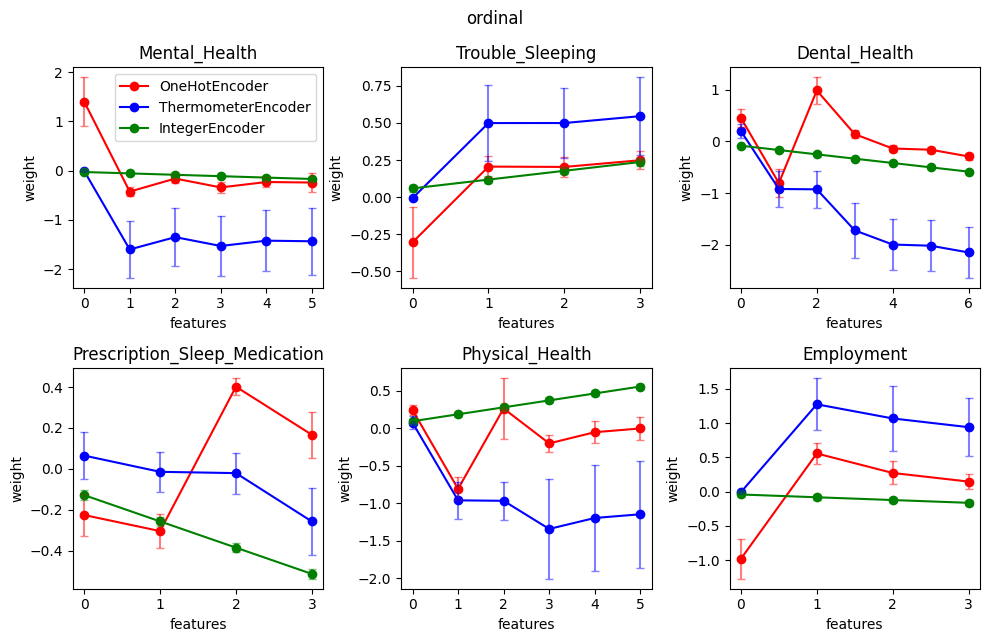

In [78]:
import matplotlib.pyplot as plt
import math
label=['OneHotEncoder', 'ThermometerEncoder', 'IntegerEncoder']
color = ['r', 'b', 'g']
keys = list(ordinal_dic.keys())
fig, ax = plt.subplots(2, 3, figsize=(10,6.5))
ax = ax.ravel()
nom_num = sum([len(val) for val in nominal_dic.values()])
ord_num_list = [len(val) for val in ordinal_dic.values()]
fig.suptitle('ordinal')
start = 0
for i, axe in enumerate(ax):
    cur_len = ord_num_list[i] 
    cur_list = range(cur_len)
    axe.plot(cur_list, all_ohe_coef_mean[nom_num+start: nom_num+start+cur_len], label = label[0], color=color[0], marker='o')
    axe.plot(cur_list, all_te_coef_mean[nom_num+start: nom_num+start+cur_len], label = label[1], color=color[1], marker='o')
    axe.plot(cur_list, all_ie_coef_mean[nom_num+start: nom_num+start+cur_len], label = label[2], color=color[2], marker='o')
    (_,caps1,_) = axe.errorbar(cur_list, all_ohe_coef_mean[nom_num+start: nom_num+start+cur_len], all_ohe_coef_std[nom_num+start: nom_num+start+cur_len],alpha = 0.5,color=color[0], fmt='.', capsize = 3)
    (_,caps2,_) = axe.errorbar(cur_list, all_te_coef_mean[nom_num+start: nom_num+start+cur_len], all_te_coef_std[nom_num+start: nom_num+start+cur_len],alpha = 0.5, color=color[1], fmt='.', capsize = 3)
    (_,caps3,_) = axe.errorbar(cur_list, all_ie_coef_mean[nom_num+start: nom_num+start+cur_len], all_ie_coef_std[nom_num+start: nom_num+start+cur_len],alpha = 0.5, color=color[2], fmt='.', capsize = 3)
    for cap in caps1+caps2+caps3:
        cap.set_markeredgewidth(1)
    axe.set_title(keys[i])
    axe.set_ylabel('weight')
    axe.set_xlabel('features')
    start += cur_len

ax[0].legend()       
plt.tight_layout()


In [79]:
res_train

{'OneHotEncoder': {'clf_rep': {'1.0': {'precision': (0.422314223787908,
     0.08934971960523388),
    'recall': (0.0812309591394095, 0.028419667372968402),
    'f1-score': (0.13541618075849685, 0.04487839634147569),
    'support': (117.9, 2.2561028345356955)},
   '2.0': {'precision': (0.5538108792118375, 0.009713599633654079),
    'recall': (0.8816207265855738, 0.019664020376164725),
    'f1-score': (0.680232371665087, 0.011826390597637565),
    'support': (334.8, 4.06939798987516)},
   '3.0': {'precision': (0.5370413797163035, 0.03198849357482235),
    'recall': (0.24806847699594656, 0.02778913297360964),
    'f1-score': (0.3386731271900092, 0.02993635069551599),
    'support': (189.9, 3.5623026261113755)},
   'accuracy': (0.5476199473844858, 0.012102158370818933),
   'macro avg': {'precision': (0.5043888275720163, 0.03644794286964424),
    'recall': (0.4036400542403099, 0.014402079680716256),
    'f1-score': (0.38477389320453104, 0.022486140956880365),
    'support': (642.6, 0.48989

In [80]:
res

{'OneHotEncoder': {'clf_rep': {'1.0': {'precision': (0.16666666666666669,
     0.31622776601683794),
    'recall': (0.028869047619047617, 0.04787968108231526),
    'f1-score': (0.04837662337662337, 0.08232232332847929),
    'support': (13.1, 2.2561028345356955)},
   '2.0': {'precision': (0.5193468640419547, 0.08047658010865884),
    'recall': (0.8122777724309076, 0.06672388457479712),
    'f1-score': (0.6310668722270869, 0.07179679247632786),
    'support': (37.2, 4.06939798987516)},
   '3.0': {'precision': (0.3402813852813853, 0.134110795181007),
    'recall': (0.16942476924893804, 0.09948189752689533),
    'f1-score': (0.21819058031652777, 0.09989910387272864),
    'support': (21.1, 3.5623026261113755)},
   'accuracy': (0.47760172143974955, 0.0758234862876135),
   'macro avg': {'precision': (0.3420983053300023, 0.1251466496845781),
    'recall': (0.33685719643296447, 0.04576700754764235),
    'f1-score': (0.29921135864007936, 0.05701766174637759),
    'support': (71.4, 0.489897948556

In [81]:
with open('npha_result/npha_c_10.csv','w') as f:
    for df in df_lists:
        f.write(f"{df.columns.name}\n")
        df.to_csv(f)
        f.write("\n")